In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import easygui

In [2]:
dataPath='/data/PPI/Run_Results.txt'
data=pd.read_csv(dataPath,header=None)

In [3]:
header= {0:'Chamber',1:'Subject',2:'Session',3:'Channel',4:'Trial',5:'Trial Num',6:'Group',7:'Param',8:'Trial List Block',9:'Samples',10:'Rate',11:'V Start',12:'mV Max',13:'T Max',14:'mv Avg',15:'V Peak',16:'T Peak',17:'Run Time',18:'TimeStamp',19:'Run Data'}




In [4]:
data = data.rename(columns=header)

In [127]:
data = pd.concat((data,data.Session.str.split('_', expand=True)), axis=1).rename(columns={0:'date',1:'anim',2:'extra'})

In [128]:
data = pd.concat((data,data.Trial.str.split('dB',expand=True)),axis=1).rename(columns={0:'startle_dB',1:'trial type'})

In [129]:
idx = data.loc[:,'startle_dB']=='No stimulus'
data.loc[idx,'startle_dB']=0

In [130]:
data.loc[idx,'trial type']='No Stim'

In [131]:
idx = data.extra=='T2'
data.loc[idx,'Chamber']=2

In [142]:
dLen = len(data)
data['PPI']=np.where(data.Trial.str.contains('PPI'),1,0)

In [5]:

data.head()

,Chamber,Subject,Session,Channel,Trial,Trial Num,Group,Param,Trial List Block,Samples,Rate,V Start,mV Max,T Max,mv Avg,V Peak,T Peak,Run Time,TimeStamp,Run Data
0,1,NaN,180904_LDF48,1,100dB startle,16,NaN,NaN,1,100,1000,11,174,21,56,0,0,9/4/2018 3:40:49 PM,0.0,NaN
1,1,NaN,180904_LDF48,1,102dB startle,17,NaN,NaN,1,100,1000,2,954,28,171,0,0,9/4/2018 3:41:09 PM,0.0,NaN
2,1,NaN,180904_LDF48,1,104dB startle,18,NaN,NaN,1,100,1000,9,124,49,40,0,0,9/4/2018 3:41:35 PM,0.0,NaN
3,1,NaN,180904_LDF48,1,106dB startle,19,NaN,NaN,1,100,1000,5,835,27,148,0,0,9/4/2018 3:41:51 PM,0.0,NaN
4,1,NaN,180904_LDF48,1,108dB startle,20,NaN,NaN,1,100,1000,3,813,18,193,0,0,9/4/2018 3:42:11 PM,0.0,NaN


In [144]:
print(data.Session.unique())
print(data.extra.unique())
print(data.startle_dB.unique())
print(data['trial type'].unique())
print(data.Chamber.unique())
print(len(data))

['180904_LDF48' '180904_LDF48_rPPI' '180904_LDF79' '180904_LDF79_rPPI'
 '180918_LDF46' '180918_LDF83' '180924_LDF50' '180924_LDF85'
 '180926_LDF84' '180926_LDF84_T2' '180926_LDF86' '180926_LDF86_T2'
 '180927_LDF84' '180927_LDF86' '181008_LDF68' '181009_LDF91'
 '181010_LDF90' '181015_LDF67' '181015_LDF93' '181015_LDF94']
[None 'rPPI' 'T2']
['100' '102' '104' '106' '108' '110' '112' '114' '116' '118' '120' '70'
 '72' '74' '76' '78' '80' '82' '84' '86' '88' '90' '92' '94' '96' '98' 0
 'PPI 114/70' 'PPI 114/75' 'PPI 114/80' 'Prepulse 75 only' 'PPI 102/70'
 'PPI 102/75' 'PPI 102/80']
[' startle' 'No Stim' None]
[1 2]
520


In [40]:
custom_style = {'figure.facecolor':'.4',
                "axes.facecolor":".4",
                'axes.edgecolor':'.4',
                "axes.labelcolor":"white",
                "axes.grid":False,
                'grid.color':'black',
                "text.color":"white",
                "patch_edgecolor":'white',
                "xtick.color":"white",
                "ytick.color":"white",
                'axes.edgecolor':'black'}
sns.set_style('white',rc=custom_style)
sns.set_context('talk')
col_palette = sns.color_palette("husl")

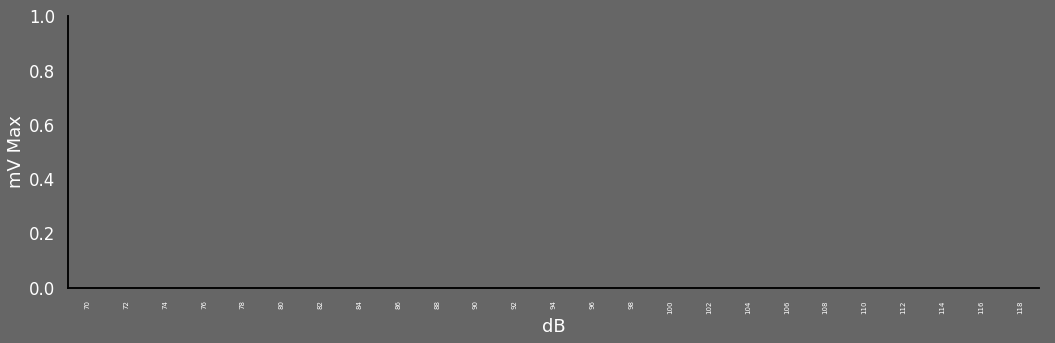

In [68]:
plt.rcParams["figure.figsize"] = (20, 4)
plt.rcParams["xtick.labelsize"] = 7
ax = sns.catplot(x="dB",y="mV Max",data=data[pd.isna(data.extra)],kind='box',aspect=3,order=range(70,120,2))
ax.set_xticklabels(rotation=90)

In [63]:
pd.isna(data.extra)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26     False
27     False
28     False
29     False
       ...  
490     True
491     True
492     True
493     True
494     True
495     True
496     True
497     True
498     True
499     True
500     True
501     True
502     True
503     True
504     True
505     True
506     True
507     True
508     True
509     True
510     True
511     True
512     True
513     True
514     True
515     True
516     True
517     True
518     True
519     True
Name: extra, Length: 520, dtype: bool